# Point Processing and Image Histograms

Faisal Qureshi      
http://www.vclab.ca

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def imshow(image, title=None):
    plt.axis('off')
    if title:
        plt.title(f'{title} ({image.shape[0]} x {image.shape[1]} - {image.dtype})')
    else:
        plt.title(f'{image.shape[0]} x {image.shape[1]} - {image.dtype}')

    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)

In [3]:
#image_file = 'IMG_3361.jpg'
image_file = '20040516-20040509-Prague-1773.jpg'
#image_file = 'chaplin.jpg'

## Loading images

We will OpenCV to load images. 

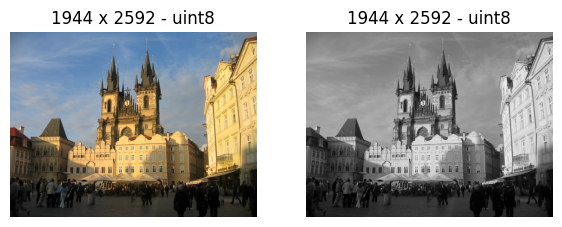

In [4]:
image_color = cv2.imread(image_file)
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(7,5))
plt.subplot(121)
imshow(image_color)
plt.subplot(122)
imshow(image)

## A note about computing histograms

Say an image where each pixel can take L levels, we need to construct
L bins to record the count of pixels.  Here bin k will record the count
of pixels that all have intensity k, where k is one of {0,1,2,...,L-1}.

We can pass the desired bins to `numpy.histogram` method as follows:
bins = [0,1,2,...,L+1].  This construction is somewhat odd, but there is a very
good reason to use it.  For `numpy.histogram` all bins except the last bin is
half-open, so the first bin is [0,1) and it includes all values between 0 and 1, but not 1.  
The last bin is [L-1,L], which contains all values between L-1 and L, including L.  
Recall that the there is no level L.  Rather the levels lie between 0 and L-1.

In [5]:
L = 256
bins = np.arange(L + 1)
hist, bin_edges = np.histogram(image, bins)
print(f'Number of bins = {len(hist)}')

Number of bins = 256


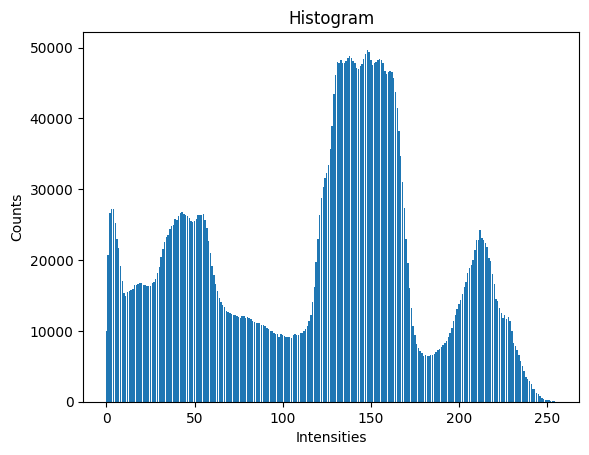

In [6]:
plt.title('Histogram')
plt.xlabel('Intensities')
plt.ylabel('Counts')
plt.bar(np.arange(L), hist);

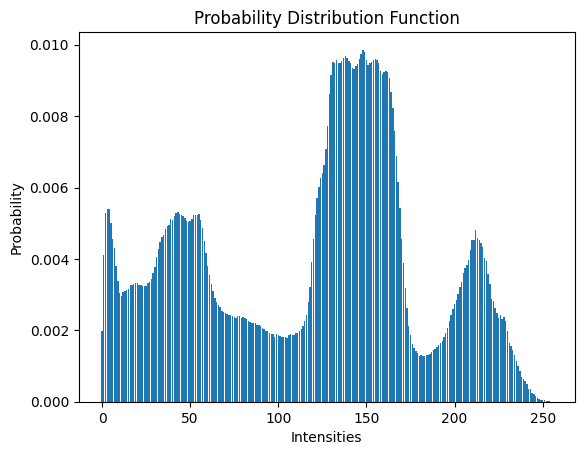

In [7]:
pdf = hist / np.sum(hist)
plt.title('Probability Distribution Function')
plt.xlabel('Intensities')
plt.ylabel('Probability')
plt.bar(np.arange(L), pdf);

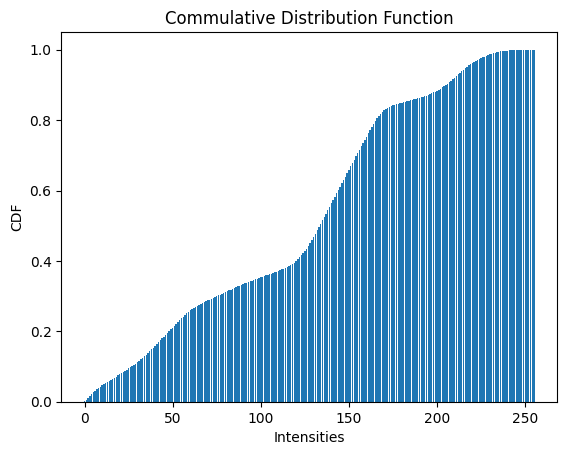

In [8]:
cdf = np.cumsum(pdf)
plt.title('Commulative Distribution Function')
plt.xlabel('Intensities')
plt.ylabel('CDF')
plt.bar(np.arange(L), cdf);

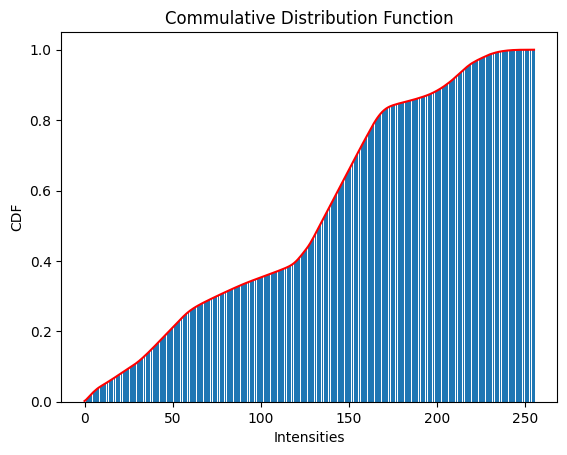

In [9]:
plt.title('Commulative Distribution Function')
plt.xlabel('Intensities')
plt.ylabel('CDF')
plt.plot(np.arange(L), cdf, 'r');
plt.bar(np.arange(L), cdf);

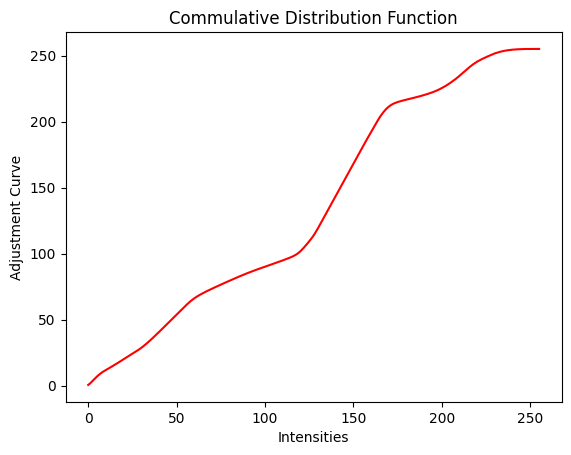

In [10]:
adjustment_curve = cdf*255
plt.title('Commulative Distribution Function')
plt.xlabel('Intensities')
plt.ylabel('Adjustment Curve')
plt.plot(np.arange(L), adjustment_curve, 'r');

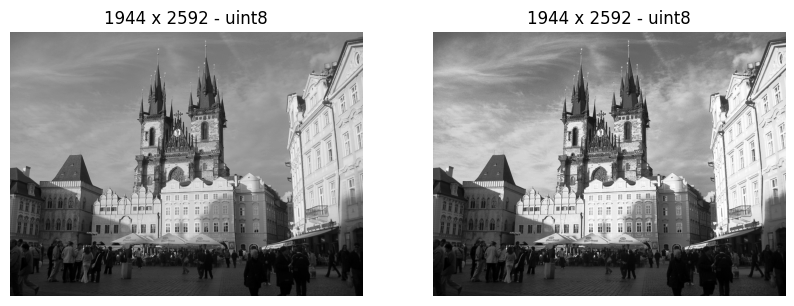

In [11]:
adjusted_image = adjustment_curve[image].astype(np.uint8)

plt.figure(figsize=(10,7))
plt.subplot(121)
imshow(image)
plt.subplot(122)
imshow(adjusted_image)

In [12]:
adjusted_hist, bin_edges = np.histogram(adjusted_image, bins)
print(f'Number of bins = {len(hist)}')

Number of bins = 256


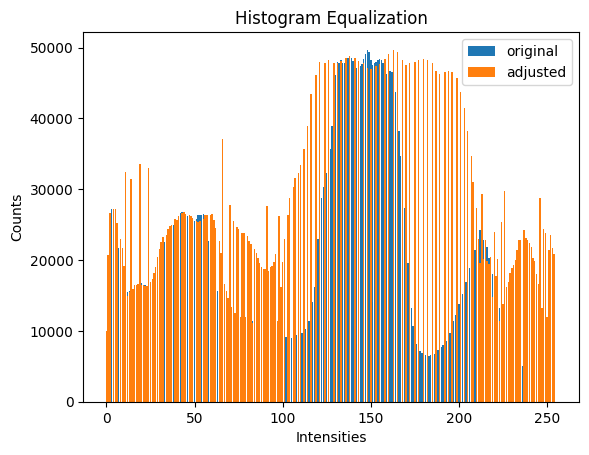

In [13]:
plt.title('Histogram Equalization')
plt.xlabel('Intensities')
plt.ylabel('Counts')
plt.bar(np.arange(L), hist, label='original');
plt.bar(np.arange(L), adjusted_hist, label='adjusted')
plt.legend();